# Experiment

In [62]:
from cdsgd import DSClustering
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris,load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Experimento

In [40]:
atom = pd.read_csv('data/Atom_Data.csv')
atom_labels = pd.read_csv('data/Atom_Labels.csv')
chainlink = pd.read_csv('data/Chainlink_Data.csv')
chainlink_labels = pd.read_csv('data/Chainlink_Labels.csv')
engytime = pd.read_csv('data/EngyTime_Data.csv')
engytime_labels = pd.read_csv('data/EngyTime_Labels.csv')
hepta = pd.read_csv('data/Hepta_Data.csv')
hepta_labels = pd.read_csv('data/Hepta_Labels.csv')
tetra = pd.read_csv('data/Tetra_Data.csv')
tetra_labels = pd.read_csv('data/Tetra_Labels.csv')
target = pd.read_csv('data/Target_Data.csv')
target_labels = pd.read_csv('data/Target_Labels.csv')
two_diamonds = pd.read_csv('data/TwoDiamonds_Data.csv')
two_diamonds_labels = pd.read_csv('data/TwoDiamonds_Labels.csv')
wing_nut = pd.read_csv('data/WingNut_Data.csv')
wing_nut_labels = pd.read_csv('data/WingNut_Labels.csv')
# Cargamos los datasets clasico de sklearn
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_labels = pd.DataFrame(iris.target, columns=['target'])
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_labels = pd.DataFrame(wine.target, columns=['target'])
# Cargamos los datasets de prueba de la tesis
uniform = pd.read_csv('data/uniform_df.csv')
uniform_data = uniform.drop(columns=['labels'])
uniform_labels = pd.DataFrame(uniform['labels'])
rectangle = pd.read_csv('data/rectangle_df.csv')
rectangle_data = rectangle.drop(columns=['labels'])
rectangle_labels = pd.DataFrame(rectangle['labels'])
gaussian = pd.read_csv('data/gaussian_df.csv')
gaussian_data = gaussian.drop(columns=['labels'])
gaussian_labels = pd.DataFrame(gaussian['labels'])
gaussian_mix = pd.read_csv('data/gaussian_mix_df.csv')
gaussian_mix_data = gaussian_mix.drop(columns=['labels'])
gaussian_mix_labels = pd.DataFrame(gaussian_mix['labels'])
datasets = [
    {
        'name': 'Atom',
        'data': atom,
        'labels': atom_labels,
        'n_clusters': atom_labels.nunique().values[0]
    },{
        'name': 'Chainlink',
        'data': chainlink,
        'labels': chainlink_labels,
        'n_clusters': chainlink_labels.nunique().values[0]
    },{
        'name': 'EngyTime',
        'data': engytime,
        'labels': engytime_labels,
        'n_clusters': engytime_labels.nunique().values[0]
    },{
        'name': 'Hepta',
        'data': hepta,
        'labels': hepta_labels,
        'n_clusters': hepta_labels.nunique().values[0]
    },{
        'name': 'Tetra',
        'data': tetra,
        'labels': tetra_labels,
        'n_clusters': tetra_labels.nunique().values[0]
    },{
        'name': 'Target',
        'data': target,
        'labels': target_labels,
        'n_clusters': target_labels.nunique().values[0]
    },{
        'name': 'TwoDiamonds',
        'data': two_diamonds,
        'labels': two_diamonds_labels,
        'n_clusters': two_diamonds_labels.nunique().values[0]
    },{
        'name': 'WingNut',
        'data': wing_nut,
        'labels': wing_nut_labels,
        'n_clusters': wing_nut_labels.nunique().values[0]
    },{
        'name': 'Iris',
        'data': iris_data,
        'labels': iris_labels,
        'n_clusters': 3
    },{
        'name': 'Wine',
        'data': wine_data,
        'labels': wine_labels,
        'n_clusters': 3
    },{
        'name': 'Uniform',
        'data': uniform_data,
        'labels': uniform_labels,
        'n_clusters': uniform_labels.nunique().values[0]
    },{
        'name': 'Rectangle',
        'data': rectangle_data,
        'labels': rectangle_labels,
        'n_clusters': rectangle_labels.nunique().values[0]
    },{
        'name': 'Gaussian',
        'data': gaussian_data,
        'labels': gaussian_labels,
        'n_clusters': gaussian_labels.nunique().values[0]
    },{
        'name': 'GaussianMix',
        'data': gaussian_mix_data,
        'labels': gaussian_mix_labels,
        'n_clusters': gaussian_mix_labels.nunique().values[0]
    }
]

# Atom

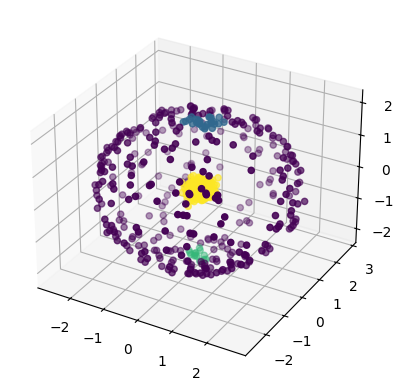

In [47]:
scaler = StandardScaler()
atom_scaled = scaler.fit_transform(atom)
atom = pd.DataFrame(atom_scaled, columns=atom.columns)

dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(atom)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(atom['X1'], atom['X2'], atom['X3'], c=dbscan_labels)
plt.show()


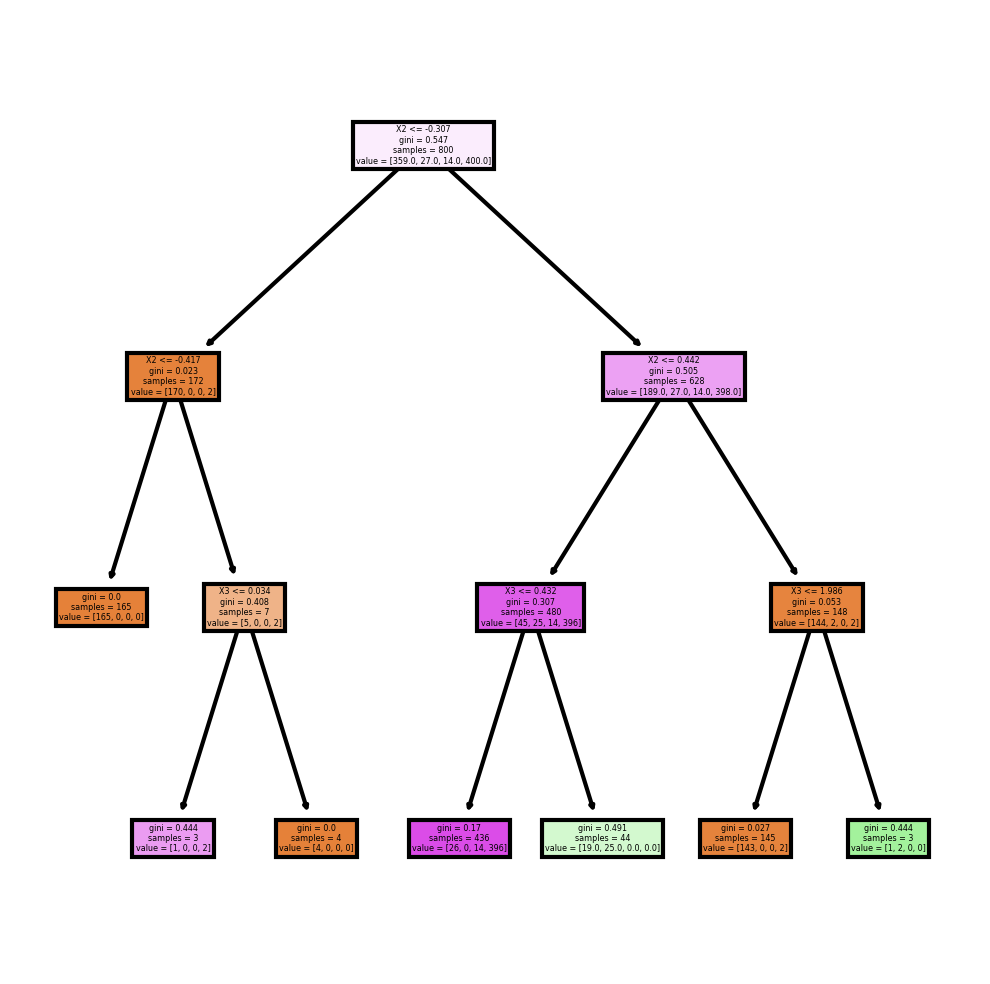

In [49]:

# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(atom, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=atom.columns)
print("")

c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


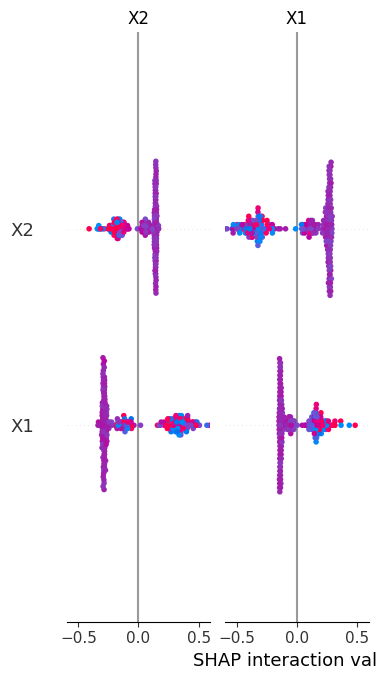

In [52]:
# interpretamos con shap  un random forest
X_train, X_test, y_train, y_test = train_test_split(atom, atom_labels, test_size=0.3, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Optimization started
Processing epoch	373	0.0008	
Training time: 37.40s, epochs: 400

Least training loss reached: 0.001


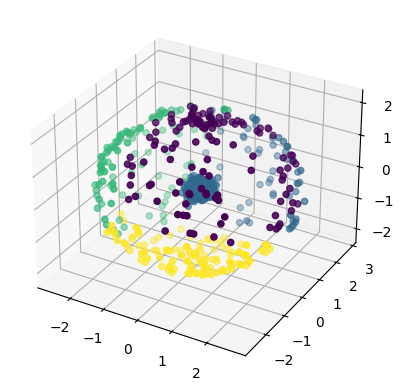

In [45]:
cdsgd = DSClustering(data=atom)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(atom['X1'], atom['X2'], atom['X3'], c=cdsgd_labels)
plt.show()


In [46]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.712] R19: X3 > 0.674
			0: 0.554	1: 0.000	2: 0.361	3: 0.000	Unc: 0.085

	[0.681] R11: X1 > 0.607
			0: 0.475	1: 0.181	2: 0.000	3: 0.320	Unc: 0.024

	[0.666] R9: -0.706 < X1 < -0.050
			0: 0.473	1: 0.275	2: 0.000	3: 0.188	Unc: 0.064

	[0.593] R12: X2 < -0.657
			0: 0.353	1: 0.000	2: 0.532	3: 0.111	Unc: 0.003

	[0.280] R13: -0.657 < X2 < 0.002
			0: 0.120	1: 0.223	2: 0.000	3: 0.312	Unc: 0.345

	[0.233] R34: Positive X1 - -0.050, X3 - 0.040
			0: 0.129	1: 0.292	2: 0.000	3: 0.001	Unc: 0.579

	[0.218] R33: Negative X1 - -0.050, X2 - 0.002
			0: 0.171	1: 0.046	2: 0.000	3: 0.060	Unc: 0.723

Most important rules for Cluster 1

	[0.741] R15: X2 > 0.662
			0: 0.003	1: 0.596	2: 0.324	3: 0.000	Unc: 0.078

	[0.507] R9: -0.706 < X1 < -0.050
			0: 0.473	1: 0.275	2: 0.000	3: 0.188	Unc: 0.064

	[0.458] R18: 0.040 < X3 < 0.674
			0: 0.000	1: 0.458	2: 0.000	3: 0.000	Unc: 0.542

	[0.420] R11: X1 > 0.607
			0: 0.475	1: 0.181	2: 0.000	3: 0.320	Unc: 0.024

	[0.382] R

# Chainlink

In [ ]:
scaler = StandardScaler()
atom_scaled = scaler.fit_transform(atom)
atom = pd.DataFrame(atom_scaled, columns=atom.columns)

dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(atom)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(atom['X1'], atom['X2'], atom['X3'], c=dbscan_labels)
plt.show()


In [8]:
#evaluamos los resultados
for i in range(3):
    results = pd.read_csv('results/results'+str(i)+'.csv')
    for dataset in results['Dataset'].unique():
        dataset_results = results[results['Dataset'] == dataset]
        print("Dataset: ", dataset)
        print("-----------------------------")
        print(dataset_results)
        print("-----------------------------")

Dataset:  Atom
-----------------------------
  Dataset                         Algorithm  Silhouette      Dunn      Rand  \
0    Atom                            KMeans    0.389760  0.051867  0.149491   
1    Atom                            DBSCAN    0.460870  0.018507  0.567669   
2    Atom                     Agglomerative    0.383773  0.068420  0.067072   
3    Atom                  CDSDG Clustering    0.453309  0.036231  0.487792   
4    Atom                      CDSDG Voting    0.453309  0.036231  0.487792   
5    Atom  CDSDG Clustering with n_clusters    0.388044  0.027397  0.171543   

    Pearson  
0 -0.490214  
1  0.915116  
2 -0.386556  
3 -0.297969  
4 -0.297969  
5  0.511693  
-----------------------------
Dataset:  Chainlink
-----------------------------
      Dataset                         Algorithm  Silhouette      Dunn  \
6   Chainlink                            KMeans    0.282240  0.017234   
7   Chainlink                            DBSCAN    0.153636  0.220721   
8   